# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The goal of our classifier is to predict, using a logistic regression, if a patient may take a certain drug.

The dataset contains both numerical and categorical input variables, while the response variable ('Drug') has multiple levels. To simplify our analysis here, we focus on predicting if a patient may take "Drug-Y".

In [1]:
# You may need these
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
seed=0
%matplotlib inline

## Question 1: /18 pts

1. Read in the `drug.csv` dataset and display the first 5 rows.
2. Print out all columns in the dataset and list categorical variables. Use the build-in function `get_dummies()` to convert all categorical variables (**exclude Drug variable**) to dummy variables. You may read the official explanations for more information on `get_dummies()` [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). What's the size of the dataframe after transforming it?
3. Map the target values from yes/no to 1/0. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 50.1% or 0.501).

1.1 Read the dataset and display the first 8 rows, and print out all columns in the dataset and **list** all categorical variables in the answer part.

In [2]:
# Question 1.1 code here

# read dataset
pd_dataset = pd.read_csv('drug.csv')

print('> First 8 rows:')
print(pd_dataset.head(8))

# name of columns
print('\n> Name of Columns:')
print(pd_dataset.columns.values)

#5 pts

> First 8 rows:
   Age  Sex      BP Cholesterol  Na_to_K   Drug
0   23    F    HIGH        HIGH   25.355  DrugY
1   47    M     LOW        HIGH   13.093  DrugY
2   47    M     LOW        HIGH   10.114  DrugY
3   28    F  NORMAL        HIGH    7.798  drugX
4   61    F     LOW        HIGH   18.043  DrugY
5   22    F  NORMAL        HIGH    8.607  drugX
6   49    F  NORMAL        HIGH   16.275  DrugY
7   41  NaN     LOW        HIGH   11.037  drugC

> Name of Columns:
['Age' 'Sex' 'BP' 'Cholesterol' 'Na_to_K' 'Drug']


**YOUR ANSWER HERE:** [1pt] 

Categorical variables: Sex, BP, Cholesterol, Drug (Drug is our classification label).

1.2 Check that is any there missing value in each column of the dataset.  

In [3]:
# Question 1.2 code here

# count number of none in each column
print('Number of missing value for each column:')

print(pd_dataset.isnull().sum(axis='index'))
#2 pts

Number of missing value for each column:
Age            0
Sex            3
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


1.3 Replace all the missing values in **Sex** to be 'M'.

In [4]:
# Question 1.3 code here

# fill none item in sex column with M  
pd_dataset['Sex'].fillna(value='M', inplace=True)
#2 pts

1.4 Use the build-in function `get_dummies()` to convert all categorical variables (**excluding `Drug` variable**) to dummy variables. What's the size of the dataframe after transforming?

In [5]:
# Question 1.4 code here

# convert categorical columns
pd_dataset = pd.get_dummies(data=pd_dataset, columns=['Sex', 'BP', 'Cholesterol'])

print(pd_dataset.head())

print('\n> Name of columns:')
print(pd_dataset.columns)

print('\n> Number of columns:')
print(len(pd_dataset.columns))


#2 pts

   Age  Na_to_K   Drug  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  \
0   23   25.355  DrugY      1      0        1       0          0   
1   47   13.093  DrugY      0      1        0       1          0   
2   47   10.114  DrugY      0      1        0       1          0   
3   28    7.798  drugX      1      0        0       0          1   
4   61   18.043  DrugY      1      0        0       1          0   

   Cholesterol_HIGH  Cholesterol_NORMAL  
0                 1                   0  
1                 1                   0  
2                 1                   0  
3                 1                   0  
4                 1                   0  

> Name of columns:
Index(['Age', 'Na_to_K', 'Drug', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW',
       'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL'],
      dtype='object')

> Number of columns:
10


**YOUR ANSWER HERE:** [1pt]

New column names are: 'Age', 'Na_to_K', 'Drug', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL'

Number of new columns: 10

1.5 Transform all the labels that are 'DrugY' in **`Drug`** to be value 1, otherwise, to be 0. Then transform the type of **`Drug`** to be 'int'.


In [6]:
# Question 1.5 code here

# convert DrugY to 1 and others to 0.
pd_dataset['Drug'][pd_dataset['Drug'] != 'DrugY'] = 0
pd_dataset['Drug'][pd_dataset['Drug'] == 'DrugY'] = 1

# convert Drug column to int
pd_dataset['Drug'] = pd_dataset['Drug'].astype(int)


#2 pts

/tmp/ipykernel_4511/2614037025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_dataset['Drug'][pd_dataset['Drug'] != 'DrugY'] = 0
/tmp/ipykernel_4511/2614037025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_dataset['Drug'][pd_dataset['Drug'] == 'DrugY'] = 1


1.6. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 0.2).

In [7]:
# Your code here
max_label_count = pd_dataset['Drug'][pd_dataset['Drug'] == 1].count()
min_label_count = pd_dataset['Drug'][pd_dataset['Drug'] == 0].count()

base_line_acc = max_label_count/(min_label_count + max_label_count)

print("Baseline Accuracy: {}".format(base_line_acc.round(1)))
#2 pts

Baseline Accuracy: 0.5


**YOUR ANSWER HERE:** [1pt] 

Baseline Accuracy: 0.5

## Question 2: /7 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 25% of observations as the test set.  Pass `random_state=11` to `train_test_split` to ensure you get the same train and tests sets as the solution. Your dependent variable in the the dataset is named as `Drug`. How many patients who take "DrugY" in the train dataset and test dataset, respectively?

In [8]:
# Question 2 code here.

# Don't use the "Drug" as a feature

# separate features and class
X_all = pd_dataset.drop('Drug', axis='columns')
y_all = pd_dataset['Drug']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all.values, test_size=0.25, random_state=11)

print('DrugY in train set: {}'.format((y_train == 1).sum()))
print('DrugY in test set:  {}'.format((y_test == 1).sum()))

#6 pts correct code

DrugY in train set: 76
DrugY in test set:  26


**YOUR ANSWER HERE:** [1pt] 

DrugY in train set: 76

DrugY in test set:  26

## Question 3: /20 pts

3.1 Create a instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression.
Using this object, **run a logisitic regression analysis** of `Drug` (y-variable) against `Age` and `Na_to_K` (x-variables) using your training data. Report the parameters (variables and intercept) of your model as indicated with the `print` function.

In [9]:
# Question 3 code here

# create logistic regression instance
classifier_lreg = LogisticRegression(penalty='none')

# train with training set
classifier_lreg.fit(X_train[['Age', 'Na_to_K']], y_train)

# print parameters of model
print('Intercept: {}, Coefficients: {}'.format(classifier_lreg.intercept_, classifier_lreg.coef_))

#10 pts 

Intercept: [-8.72001306], Coefficients: [[-0.01090483  0.65752731]]


/home/farhad-bat/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


3.2 Compute 4 label-based criteria, namely, 'Accuracy', 'Precision', 'Sensitivity' and 'Specificity' for your two variables only classifier **using the test data** (Round into 4 decimal place). Use a threshold of 0.5. Answer the questions in this text box below.

In [10]:
## Put code here to compute criteria:

def compute_criterias(y_true, y_pred, positive_class):

    if len(y_true) != len(y_pred):
        raise ValueError('Size of predicted y and ground truth y is not the same.')

    # calculate true positve
    tp = sum(np.logical_and(y_true == positive_class, y_pred == positive_class))

    # calculate true nagative
    tn = sum(np.logical_and(y_true != positive_class, y_pred != positive_class))

    # calculate false positive
    fp = sum(np.logical_and(y_true != positive_class, y_pred == positive_class))

    # calculate false nagative
    fn = sum(np.logical_and(y_true == positive_class, y_pred != positive_class))

    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    precision = tp / (tp + fp)
    
    # Recall
    sensitivity = tp / (tp + fn)    
    
    # Specificity
    specificity = tn / (fp + tn)

    print('TP: {}, TN: {}, FP:{}, FN: {}'.format(tp, tn, fp, fn))

    return {'accuracy': accuracy, 'precision': precision, 'sensitivity': sensitivity, 'specificity': specificity}

#5 pts

In [11]:
## Put the code you need to answer the following questions.

print('Classes name in classifier: {}'.format(classifier_lreg.classes_))
positive_class = 1

# predict label for data in test set
y_test_pred_prob = classifier_lreg.predict_proba(X=X_test[['Age', 'Na_to_K']])
y_test_pred = np.where(y_test_pred_prob[:, positive_class] > 0.5, 1, 0).astype(int)

criterias = compute_criterias(y_true=y_test, y_pred=y_test_pred, positive_class=positive_class)

print()
for key in criterias:
    print("{}: {}".format(key, np.round(criterias[key], 4)))


#2 pts

Classes name in classifier: [0 1]
TP: 25, TN: 22, FP:2, FN: 1

accuracy: 0.94
precision: 0.9259
sensitivity: 0.9615
specificity: 0.9167


* How many of the test instances are labeled positive by your classifier?

**TP + FP = 25 + 2 = 27**

* Does this classifier reach the baseline accuracy?

**It is better thatn baseline accuracy. Baseline accuracy is 0.5 and the classifier accuracy is 0.94:** 

* Is this classifier useful for classifying drug-Y? Explain in one or two sentences using the performance matrix results.

**Yes, it is useful because baseline accuracy is 0.5 and accuracy for the classifier is 0.94. It means the model has learned something. Also, all metrics including accuracy, precision, sensitivity and specificity are high and more that 0.91, which show is is a good classifier. For 50 test data, FP is 2 and FN is 1, which shows the good performance.**

## Question 4: /8 pts
Now with default penalty method, fit two logistic regression models using tuning parameter $C=0.1$ and $C=1$ to the training data and include all the variables in the data frame (except for `Drug`) in the cell below. You will want to make new objects like you did for the simpler model. Print the parameters (variables and intercept) you obtain, respectively.

In [12]:
# Code for Question 4

# logistic regression with l2 and c 0.1
classifier_lreg_all_c_0_1 = LogisticRegression(penalty='l2', C=0.1)
# train with training data
classifier_lreg_all_c_0_1.fit(X=X_train, y=y_train)
# print parameters of model
print('\n>  C=0.1')
print('Intercept: {},\nCoefficients: {}'.format(classifier_lreg_all_c_0_1.intercept_, classifier_lreg_all_c_0_1.coef_))

# logistic regression with l2 and c 1.0
classifier_lreg_all_c_1 = LogisticRegression(penalty='l2', C=1.0)
# train with training data
classifier_lreg_all_c_1.fit(X=X_train, y=y_train)
# print parameters of model
print('\n>  C=1.0')
print('Intercept: {},\nCoefficients: {}'.format(classifier_lreg_all_c_1.intercept_, classifier_lreg_all_c_1.coef_))

#7 pts


>  C=0.1
Intercept: [-7.95642709],
Coefficients: [[-0.0130806   0.60277064 -0.11304191  0.11306467 -0.24194974  0.36553947
  -0.12356698  0.23756636 -0.23754361]]

>  C=1.0
Intercept: [-9.92561829],
Coefficients: [[-0.0251735   0.77566215 -0.26073173  0.2606756  -0.72103715  1.18493054
  -0.46394952  0.66529228 -0.66534841]]


* Describe the differences between the fitted model parameters obtained from the two models here.

**YOUR ANSWER: Smaller C means stronger regularization. It means coefficients for the logistic regression with lower C generally are smaller that logistic regression with higher C. The result shows the same thing. Coefficients for C=0.1 are smaller that coefficients for C=1.0.**

## Question 5: /15 pts

In the cell below, compute the 4 label-based criteria we mentioned in Question 3.2 for the two new classifiers using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 

In [13]:
# Code for  Code for answering questions in the below cell

positive_class = 1

print('=' * 20)
print('For Logisic Regression with C=0.1:')
# criterias for logistic regression with C=0.1
# predict probabilities
y_test_pred_prob = classifier_lreg_all_c_0_1.predict_proba(X=X_test)
# predict labels by thresholding
y_test_pred = np.where(y_test_pred_prob[:, positive_class] > 0.5, 1, 0).astype(int)
# computer criterias
criterias = compute_criterias(y_true=y_test, y_pred=y_test_pred, positive_class=positive_class)
print()
for key in criterias:
    print("{}: {}".format(key, np.round(criterias[key], 4)))

print('=' * 20)
print('For Logisic Regression with C=1.0:')
# criterias for logistic regression with C=1.0
# predict probabilities
y_test_pred_prob = classifier_lreg_all_c_1.predict_proba(X=X_test)
# predict labels by thresholding
y_test_pred = np.where(y_test_pred_prob[:, positive_class] > 0.5, 1, 0).astype(int)
# computer criterias
criterias = compute_criterias(y_true=y_test, y_pred=y_test_pred, positive_class=positive_class)
print()
for key in criterias:
    print("{}: {}".format(key, np.round(criterias[key], 4)))
print('=' * 20)
#9 pts

For Logisic Regression with C=0.1:
TP: 25, TN: 24, FP:0, FN: 1

accuracy: 0.98
precision: 1.0
sensitivity: 0.9615
specificity: 1.0
For Logisic Regression with C=1.0:
TP: 24, TN: 24, FP:0, FN: 2

accuracy: 0.96
precision: 1.0
sensitivity: 0.9231
specificity: 1.0


* How many of the test instances are respectively labeled positive by the two classifiers?

**For Logistic Regression with C=0.1: TP+FP = 25 + 0 = 25. 
For Logistic Regression with C=1.0: TP+FP = 24 + 0 = 24.**

* Among the classifiers in Questions 3 and 4, which one is the **best classifier** for classifying Drug? Explain the possible reason in one or two sentences.

**Among the three logistic regression (No penalty, C=0.1, C=1.0), the best one is Logistic regression with C=0.1 because it has highest values in accuracy, precision, sensitivity and specificity.**

## Question 6: /14 pts
In the cell below, predict the class coding your own sigmoid function (do NOT use  the predict function from sklear). Compare the first 5 rows using the three models constructed in question 4 and question 5.

In [14]:
# Your code here

def sigmoid_fun(x):
    sig_value = 1/(1 + np.exp(-1 * x))
    return sig_value

y_test_prob_no_penalty = sigmoid_fun(x=np.dot(X_test[['Age', 'Na_to_K']], classifier_lreg.coef_.T) + classifier_lreg.intercept_).T.tolist()[0]
y_test_prob_c_0_1 = sigmoid_fun(x=np.dot(X_test, classifier_lreg_all_c_0_1.coef_.T) + classifier_lreg_all_c_0_1.intercept_).T.tolist()[0]
y_test_prob_c_1_0 = sigmoid_fun(x=np.dot(X_test, classifier_lreg_all_c_1.coef_.T) + classifier_lreg_all_c_1.intercept_).T.tolist()[0]

print('>    Probabilities for calss 1 on test set for the three models:')
pd_result_prob_models = pd.DataFrame({'Model no penalty': y_test_prob_no_penalty, 'Model C=0.1': y_test_prob_c_0_1, 'Model C=1': y_test_prob_c_1_0})
print(pd_result_prob_models.head(5))
#8 pts


>    Probabilities for calss 1 on test set for the three models:
   Model no penalty  Model C=0.1  Model C=1
0          0.313454     0.235543   0.099167
1          0.999990     0.999945   0.999990
2          0.959078     0.943616   0.978881
3          0.047094     0.055898   0.020973
4          0.999981     0.999959   0.999998


* Is the probability given by the sigmoid function the probability of a case being negative?

**No, the output of a sigmoid function can not be negative. It always positive. Its board in (0, 1).** 

* By just looking over the first 5 cases, how does the probabilities obtained from the two classifiers in Question 4 changes? Does the change of probability actually change the classification results for the first 5 cases?

**1) Probabilities in all the three models are verry similar. In the model C=0.1 for negative class it has higher probability than C=1. Also, in the model C=1.0 for positive class in has lower probability than C=1. 2) Since the used threshold in the three models was 0.5, the predicted label for the first 5 rows do not change because none of the five data cross 0.5 threshold.** 

# Question 7: /7 pts

Plot ROC curves for all of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

Text(0.5, 1.0, 'Model C=1\nAUC=0.9903846153846154')

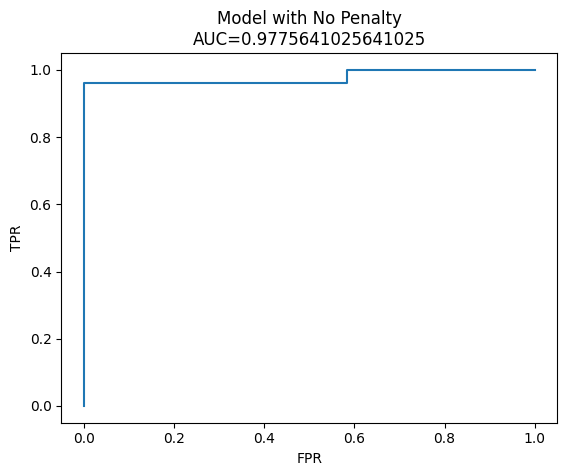

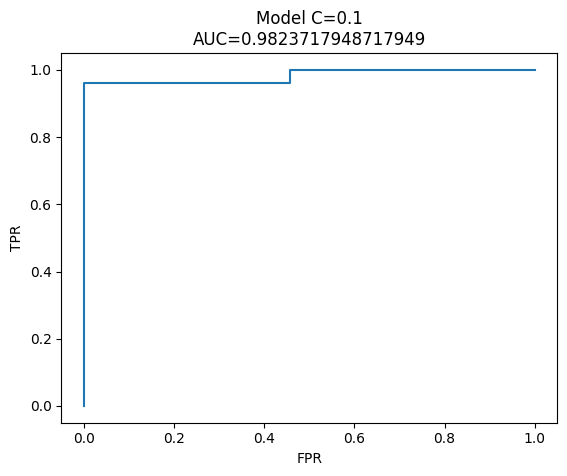

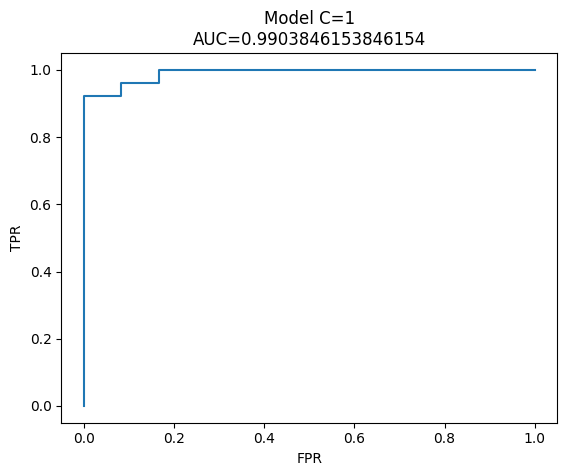

In [15]:
# Your code here

# no penalty model
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pd_result_prob_models['Model no penalty'], pos_label=classifier_lreg.classes_[1])
auc_no_penalty = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Model with No Penalty\nAUC={}'.format(auc_no_penalty))

# c=0.1 model
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pd_result_prob_models['Model C=0.1'], pos_label=classifier_lreg_all_c_0_1.classes_[1])
auc_c_0_1 = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Model C=0.1\nAUC={}'.format(auc_c_0_1))

# c=1 model
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pd_result_prob_models['Model C=1'], pos_label=classifier_lreg_all_c_1.classes_[1])
auc_c_1 = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Model C=1\nAUC={}'.format(auc_c_1))


#6 pts

* Which classifier has a highest estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**AUC (Area Under Curve) for all the three models are calculated and reported in the above figures. The AUC for no penalty model is 0.97, for C=0.1 is 0.98 and for for C=1 is 0.99. Therefore, the classifier with C=1 has the highest estimated probability of correctly distinguishing between positive and negative.** 


# Question 8: /11 pts

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. This time you have 10 classes i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. Use the same dataset and `SGDClassifier` to tain a multiclass logistic regression model with `l2` regularization. For training, include these arguments too: `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For computation speed-up, some `sklearn` functions take the argument `n_jobs=N` to run in parallel. A good value for N can be the number of physical CPU cores that your machine possesses. Check the documentations of the functions to take advantage from this where applicable. For splitting the data use `test_size=0.5` and `random_state=seed`.

Put your classifier and the `StandardScaler()` into a pipeline using `make_pipeline`. Therefore, your final model will be a pipeline that always standardizes the data before feeding it to the classifier. Use the `classification_report` to report the performance of your final model (*i.e.*, the pipeline) over the **test set**.



In [16]:
# code here

# get dataset
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# print('MNIST {}'.format(mnist.keys()))
X_all_mnist = mnist['data']
y_all_mnist = mnist['target'] 

# split dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_all_mnist, y_all_mnist, test_size=0.5, random_state=seed)


# create pipeline
pipeline = make_pipeline(StandardScaler(), SGDClassifier(loss='log', penalty='l2', max_iter=2000, tol=1e-3, n_jobs=4, random_state=seed))

# train pipeline
pipeline.fit(X_mnist_train, y_mnist_train)

# confusion matrix
y_mnist_test_pred = pipeline.predict(X_mnist_test)
conf_mat = confusion_matrix(y_true=y_mnist_test, y_pred=y_mnist_test_pred)
print('Confusion Matrix:\n{}'.format(conf_mat))
print('=' * 10)

print('\nClassification Report:\n{}'.format(classification_report(y_true=y_mnist_test, y_pred=y_mnist_test_pred)))

#9 pts

/home/farhad-bat/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/home/farhad-bat/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Confusion Matrix:
[[3324    0   12    8    8   32   35    7  107    2]
 [   0 3804   16    5    3   22    6    2   89    7]
 [  12   18 3090   47   59   10   43   25  166    5]
 [  14   13   90 3063    0  118   11   24  161   52]
 [   3    8   30    5 3104    3   23   13  108   89]
 [  21   12   23  100   42 2631   55   11  214   49]
 [  15   11   40    1   32   46 3176    6   62    0]
 [  12    7   37   17   37    7    0 3318   69  148]
 [  11   48   29   47    2   78   19    3 3115   40]
 [  15   15   20   45   81   25    0  100  169 3043]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3535
           1       0.97      0.96      0.96      3954
           2       0.91      0.89      0.90      3475
           3       0.92      0.86      0.89      3546
           4       0.92      0.92      0.92      3386
           5       0.89      0.83      0.86      3158
           6       0.94      0.94      0.94     

Let's see how the model generalizes to new data.

You can run the cell below to see how well your model can recognize a digit written by the mouse cursor. Set the `final_model` variable according to the name choses for your pipeline, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the result.

This code will not work on headless servers such as Colab. You need to install the `tk-tools` package and run it locally.

Your input:


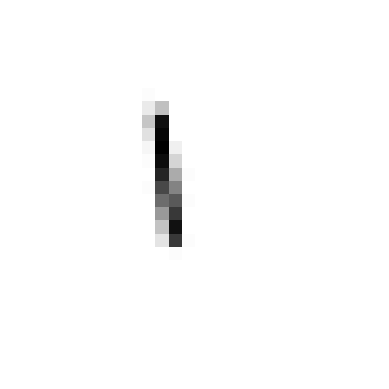

Input recognized as 5.


In [17]:
final_model =  pipeline # here use the name of your pipeline

#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"

app = Tk()
app.geometry("300x300")

canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=3.5)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()

img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
print("Your input:")
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
plt.show()

# reshaping to support our model input
img = np.reshape(img, 28*28)
#predicting the class
print('Input recognized as ' + str(final_model.predict([img])[0])+'.')

* Despite showing great scores in training and testing stages, why your model does not generalize well to new data?

**Because the drawing and new data can be out of the distribution that the classifer saw during training. For example, numbers in the MNIST are centered.**
